<a href="https://colab.research.google.com/github/charidis/KNN-Digits-Classifier/blob/main/KNN_Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

#loaded datadet
digits = load_digits()

X = digits.data
Y = digits.target

import numpy as np

Y = np.expand_dims(Y,1)
data = np.append(X, Y, 1)
# random shuffle
np.random.shuffle(data)

# split
total_sample = len(data)
train = data[:int(total_sample*0.7)] # 70% for training
dev = data[int(total_sample*0.7):int(total_sample*0.8)] # 15% for validation
test = data[int(total_sample*0.8):] # 15% for testing

# Check for data leakings
def data_leaking_check(data1, data2):
  data_leaking = False
  for d1 in data1:
    for d2 in data2:
      if(np.array_equal(d1, d2)):
        data_leaking = True
        print("Find same sample: ")
        print(d1)
  if(not data_leaking):
    print("No Data Leaking!")

  return data_leaking

# data_leaking_check(train, test)
# data_leaking_check(dev, test)
# data_leaking_check(train, dev)

# splits the dataset into features and labels.
def get_features_and_labels(data):
  features = data[:, :-1]
  labels = data[:, -1]
  return features, labels

train_x, train_y = get_features_and_labels(train)
dev_x, dev_y = get_features_and_labels(dev)
test_x, test_y = get_features_and_labels(test)

# Computes the Euclidance distance of vector
def euclidean_distance(row1,row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i]-row2[i]) ** 2
  return np.sqrt(distance)

# Computes the Manhattan distance of vector
def manhattan_distance(row1,row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (abs(row1[i]-row2[i]))
  return distance


def get_neighbors(train_x, train_y, dev_row, num_neighbors):
  distances = []

  for i in range(len(train)):
    train_row = train_x[i]
    train_label = train_y[i]
    dist1 = euclidean_distance(train_row, dev_row)
    dist2 = manhattan_distance(train_row, dev_row)


    distances.append((train_row, train_label, dist1, dist2))

  distances.sort(key=lambda i:i[3])

  output_neighbors = []
  output_labels = []
  output_distances = []

  for i in range(num_neighbors):
    output_neighbors.append(distances[i][0])
    output_labels.append(distances[i][1])
    output_distances.append((distances[i][2], distances[i][3]))

  return output_neighbors, output_labels, output_distances

def prediction_classificaiton(train_x, train_y, dev_row, num_neighbors):

  output_neighbors, output_labels, output_distances = get_neighbors(train_x, train_y,dev_row, num_neighbors)

  label_cnt = np.bincount(output_labels)

  prediction = np.argmax(label_cnt)

  return prediction
  print(X)

In [ ]:
k = 4
pred_labels = []
for dev_data in dev_x:
  pred = prediction_classificaiton(train_x, train_y, dev_data, k)
  pred_labels.append(pred)

from sklearn.metrics import accuracy_score
acc = accuracy_score(dev_y, pred_labels)
print(acc)

0.9944444444444445


Text(0.5, 1.0, 'Performance on Dev Set')

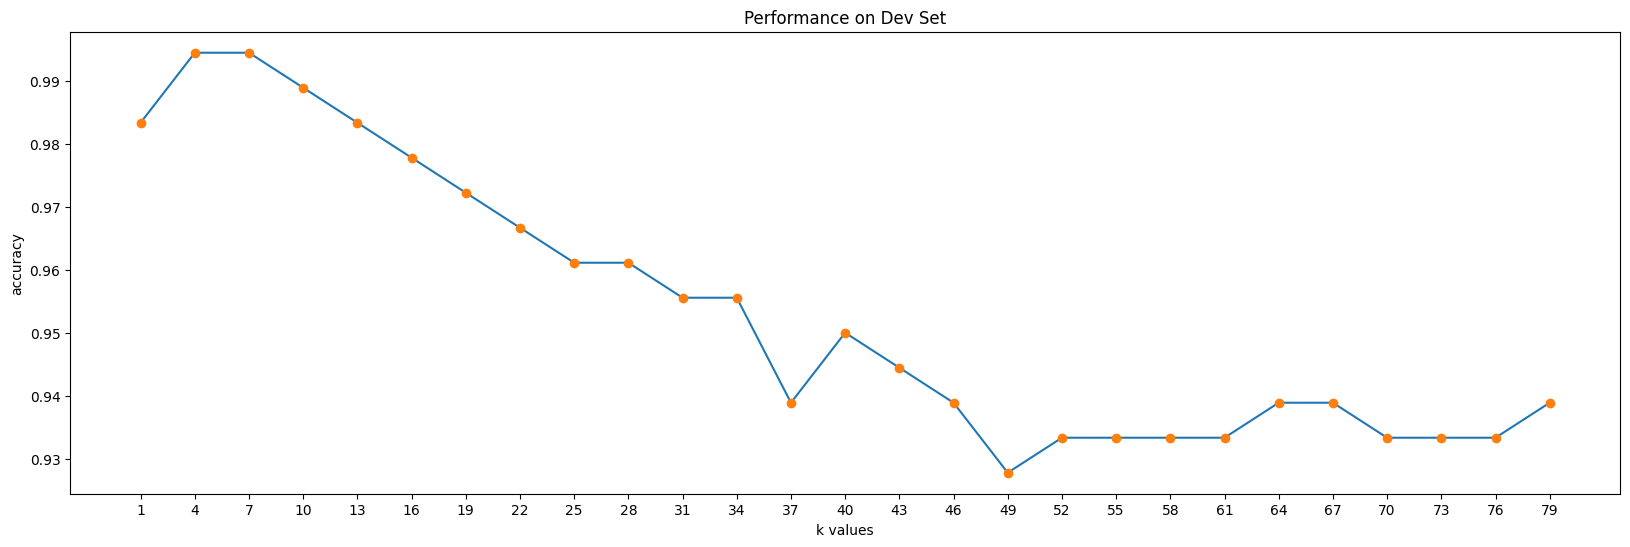

In [ ]:
k_list = list(range(1, 80, 3))
performance = []
for k in k_list:
  pred_labels = []
  for dev_data in dev_x:
    pred = prediction_classificaiton(train_x, train_y, dev_data, k)
    pred_labels.append(pred)
  acc = accuracy_score(dev_y, pred_labels)
  performance.append(acc)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks(k_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Performance on Dev Set")

In [ ]:
#testing the model
k = 4
pred_labels = []
for test_data in test_x:
  pred = prediction_classificaiton(train_x, train_y, test_data, k)
  pred_labels.append(pred)
acc = accuracy_score(test_y, pred_labels)
print(acc)

0.9777777777777777
